Pré-Ordem:
50 30 20 40 70 60 80 

Em Ordem:
20 30 40 50 60 70 80 

Pós-Ordem:
20 40 30 60 80 70 50 

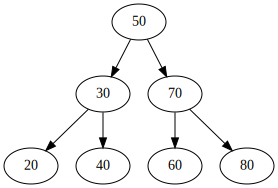

In [5]:
from graphviz import Digraph
from IPython.display import display, SVG


class Node:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.val = key


class BinaryTree:
    def __init__(self):
        self.root = None

    def insert(self, root, key):
        if root is None:
            return Node(key)
        else:
            if key < root.val:
                root.left = self.insert(root.left, key)
            else:
                root.right = self.insert(root.right, key)
        return root

    def pre_order(self, root):
        if root:
            print(root.val, end=" ")
            self.pre_order(root.left)
            self.pre_order(root.right)

    def in_order(self, root):
        if root:
            self.in_order(root.left)
            print(root.val, end=" ")
            self.in_order(root.right)

    def post_order(self, root):
        if root:
            self.post_order(root.left)
            self.post_order(root.right)
            print(root.val, end=" ")
            
    def visualize(self, root):
        """Visualize the tree using Graphviz."""
        dot = Digraph()

        def add_edges(node):
            if node:
                dot.node(str(node.val), str(node.val))
                if node.left:
                    dot.edge(str(node.val), str(node.left.val))
                    add_edges(node.left)
                if node.right:
                    dot.edge(str(node.val), str(node.right.val))
                    add_edges(node.right)

        add_edges(root)
        return dot


if __name__ == "__main__":
    tree = BinaryTree()
    elements = [50, 30, 70, 20, 40, 60, 80]
    for elem in elements:
        tree.root = tree.insert(tree.root, elem)

    print("Pré-Ordem:")
    tree.pre_order(tree.root)

    print("\n\nEm Ordem:")
    tree.in_order(tree.root)

    print("\n\nPós-Ordem:")
    tree.post_order(tree.root)

    tree_viz = tree.visualize(tree.root)
    svg = tree_viz.pipe(format="svg")  # Generate SVG content
    display(SVG(svg))